In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.model_selection import train_test_split
sb.set() # set the default Seaborn style for graphics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder #imported all for testing
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import mean_squared_error, r2_score

TEST_SIZE = 0.2

In [2]:
csv_data = pd.read_csv('../data/Road Accident Data.csv', low_memory=False)
csv_data.head()

csv_data['Accident_Severity'] = csv_data['Accident_Severity'].str.replace('Fetal', 'Fatal')
counts = csv_data['Accident_Severity'].value_counts()
print(counts)

Accident_Severity
Slight     263280
Serious     40740
Fatal        3953
Name: count, dtype: int64


In [3]:
X = csv_data[[
    'Day_of_Week',
    'Light_Conditions',  
    'Road_Surface_Conditions', 
    'Speed_limit',
    'Weather_Conditions',
    'Vehicle_Type'
]]
Y = csv_data['Accident_Severity']

In [4]:
categorical_features = [
    'Day_of_Week',
    'Light_Conditions', 
    'Road_Surface_Conditions', 
    'Speed_limit',
    'Weather_Conditions',
    'Vehicle_Type'
]
one_hot_encoder = OneHotEncoder()
preprocessor = ColumnTransformer(transformers=[('cat', one_hot_encoder, categorical_features)], remainder='passthrough')
X_encoded = preprocessor.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y, test_size=TEST_SIZE, random_state=1)

In [6]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [7]:
print(model.coef_.shape)  # This should output something like (1, n_features)
print(X.shape[1]) 

(3, 50)
6


In [8]:
y_pred = model.predict(X_test)

In [9]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8554428119165517


c:\school\Y1S2\SC1015\SC1015-MINI_PROJECT\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\school\Y1S2\SC1015\SC1015-MINI_PROJECT\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

       Fatal       0.00      0.00      0.00       828
     Serious       0.00      0.00      0.00      8076
      Slight       0.86      1.00      0.92     52691

    accuracy                           0.86     61595
   macro avg       0.29      0.33      0.31     61595
weighted avg       0.73      0.86      0.79     61595

Confusion Matrix:
 [[    0     0   828]
 [    0     0  8076]
 [    0     0 52691]]


c:\school\Y1S2\SC1015\SC1015-MINI_PROJECT\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


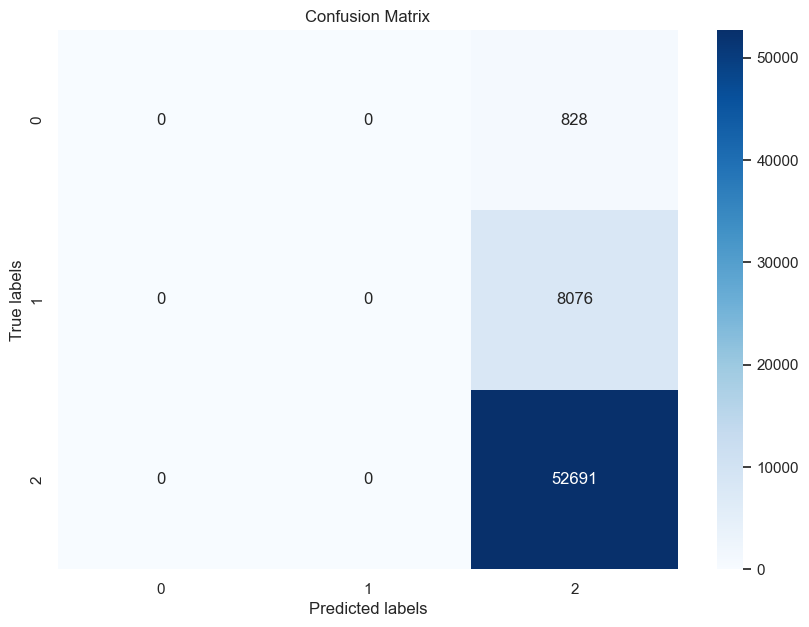

In [10]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sb.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()